In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import torch.nn as nn

In [3]:
from scipy.optimize import curve_fit

In [4]:
import pandas as pd

## Fiting a double exponential 

In [5]:
df = pd.read_csv('LIFETIME_AAN155_fre_and_chelated_1E-5M_OK.csv', sep=';', header=0,  decimal=',')

In [6]:
df

,time,AAN155Free,AAN155_Ba
0,0.000000,0.0,0.0
1,0.610352,0.0,0.0
2,1.220703,0.0,0.0
3,1.831055,0.0,0.0
4,2.441406,0.0,0.0
...,...,...,...
8187,4996.948200,9.0,27.0
8188,4997.558600,4.0,36.0
8189,4998.168900,6.0,37.0
8190,4998.779300,17.0,21.0


In [7]:
dfnames = df.columns

In [8]:
print(dfnames[1], dfnames[2])

AAN155Free AAN155_Ba


In [9]:
len(df.time.values)

8192

In [10]:
def plot_df_data(df):
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(df.time.values,df.AAN155Free.values, c='b',label=f'{dfnames[1]}')
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('I (a.u.)')
    ax[0].legend(loc='best')
    ax[1].plot(df.time.values,df.AAN155_Ba.values, c='r',label=f'{dfnames[2]}')
    ax[1].set_xlabel('t')
    ax[1].set_ylabel('I (a.u.)')
    
    ax[1].legend(loc='best')
    fig.tight_layout()
    plt.show()


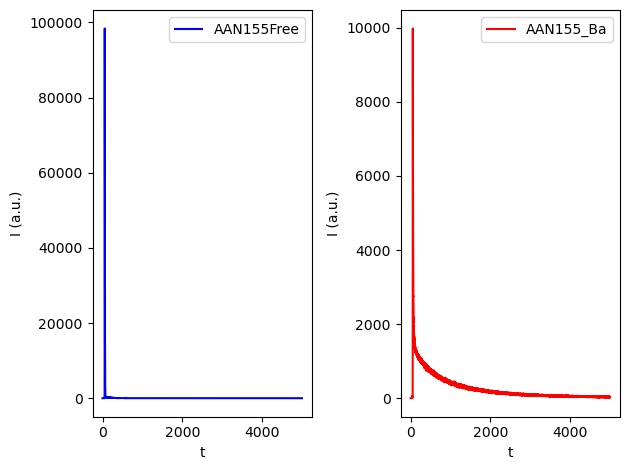

In [11]:
plot_df_data(df)

In [31]:
df2 = df.iloc[350:-1]

In [32]:
df2

,time,AAN155Free,AAN155_Ba
350,213.62300,108.0,1130.0
351,214.23340,140.0,1120.0
352,214.84375,119.0,1100.0
353,215.45410,102.0,1050.0
354,216.06445,100.0,1100.0
...,...,...,...
8186,4996.33790,5.0,33.0
8187,4996.94820,9.0,27.0
8188,4997.55860,4.0,36.0
8189,4998.16890,6.0,37.0


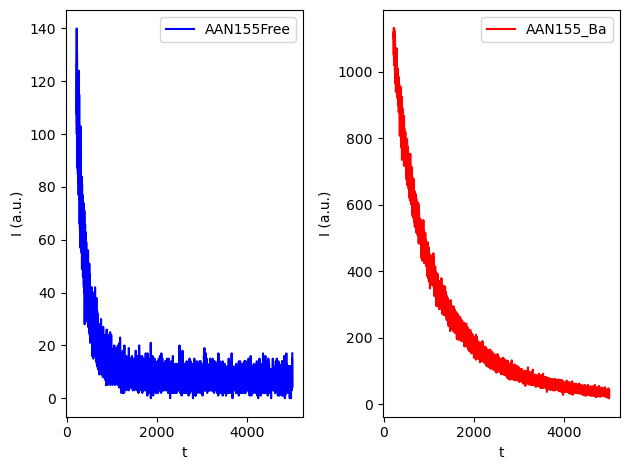

In [33]:
plot_df_data(df2)

In [15]:
# Define the number of bins

def profile(x,y,num_bins = 50): 
    # Create bins and calculate mean and standard deviation in each bin
    bins = np.linspace(x.min(), x.max(), num_bins+1)
    indices = np.digitize(x, bins)
    bin_means = [y[indices == i].mean() for i in range(1, len(bins))]
    bin_stds = [y[indices == i].std() for i in range(1, len(bins))]

    # Mid-points of bins for plotting
    bin_mids = (bins[:-1] + bins[1:]) / 2
    return bin_mids, bin_means, bin_stds



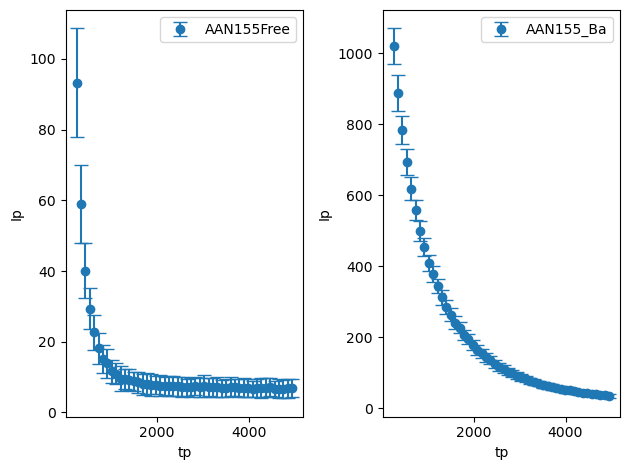

In [34]:
xp,yp,stds = profile(df2.time.values,df2.AAN155Free.values ,num_bins = 50)
xpb,ypb,stdb = profile(df2.time.values,df2.AAN155_Ba.values ,num_bins = 50)
    

fig, ax = plt.subplots(1,2)
ax[0].errorbar(xp, yp, yerr=stds, fmt='o', capsize=5, label=f'{dfnames[1]}')
ax[0].set_xlabel('tp')
ax[0].set_ylabel('Ip')
ax[0].legend(loc='best')

ax[1].errorbar(xpb, ypb, yerr=stdb, fmt='o', capsize=5, label=f'{dfnames[2]}')
ax[1].set_xlabel('tp')
ax[1].set_ylabel('Ip')
ax[1].legend(loc='best')
fig.tight_layout()
plt.show()

In [21]:
def double_exponential(x, a, b, c, d, e):
    return a * np.exp(-x/b) + c * np.exp(-x/d) + e
    

In [22]:
def fit_exp2(x, y, p0=(1e+3,1e+3,1e+3,1e+3, 1e+2 )):
    
    params, params_covariance = curve_fit(double_exponential, x, y, p0=p0)
    yfit = double_exponential(x, *params)
    residuals = y - yfit
    chi2 = sum( (residuals**2)/y ) # The chi-sqaure of your fit
    return params, yfit, chi2



In [35]:
parb, yftb, chi2b = fit_exp2(xpb,ypb, p0=(1e+3,1e+3,1e+3,1e+3, 1e+2))
print(f"fit par: a = {parb[0]:.2f}, b = {parb[1]:.2f}")
print(f"fit par: c = {parb[2]:.2f}, d = {parb[3]:.2f}, e = {parb[4]:.2f}")
print(f"chi2 of fit = {chi2b:.2f}")

fit par: a = 837.75, b = 1161.34
fit par: c = 660.97, d = 368.15, e = 24.27
chi2 of fit = 0.77


In [36]:
parf, yftf, chi2f = fit_exp2(xp,yp, p0=(1e+3,1e+3,1e+3,1e+3, 1e+2))
print(f"fit par: a = {parf[0]:.2f}, b = {parf[1]:.2f}")
print(f"fit par: c = {parf[2]:.2f}, d = {parf[3]:.2f}, e = {parf[4]:.2f}")
print(f"chi2 of fit = {chi2f:.2f}")

fit par: a = -21484.46, b = -31541456.38
fit par: c = 298.32, d = 203.58, e = 21494.03
chi2 of fit = 1.66


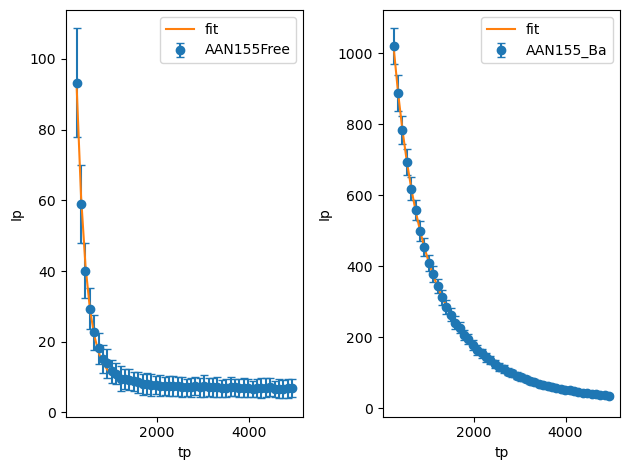

In [37]:
fig, ax = plt.subplots(1,2)
ax[0].errorbar(xp, yp, yerr=stds, fmt='o', capsize=3, label=f'{dfnames[1]}')
ax[0].plot(xp, yftf, label="fit")
ax[0].set_xlabel('tp')
ax[0].set_ylabel('Ip')
ax[0].legend(loc='best')

ax[1].errorbar(xpb, ypb, yerr=stdb, fmt='o', capsize=3, label=f'{dfnames[2]}')
ax[1].plot(xpb, yftb, label="fit")
ax[1].set_xlabel('tp')
ax[1].set_ylabel('Ip')
ax[1].legend(loc='best')
fig.tight_layout()
plt.show()

In [26]:
def norm2exp(pars):
    a = pars[0]
    b = pars[1]
    c = pars[2] 
    d = pars[3] 
    e = pars[4]
    return a/(a+c+e), b, c/(a+c+e), d, e/(a+c+e)
    

In [38]:
i1f, l1f, i2f, l2f, ef = norm2exp(parf)
print(f'Ann Free')
print(f'Intensity of exponential 1 = {i1f:.4f}, lifetime = {l1f:.4f} ns') 
print(f'Intensity of exponential 2 = {i2f:.4f}, lifetime = {l2f:.4f} ns') 
print(f'Intensity of constant term = {ef:.4f}') 

Ann Free
Intensity of exponential 1 = -69.7809, lifetime = -31541456.3761 ns
Intensity of exponential 2 = 0.9689, lifetime = 203.5796 ns
Intensity of constant term = 69.8119


In [39]:
i1b, l1b, i2b, l2b, eb = norm2exp(parb)
print(f'Ann Ba2+')
print(f'Intensity of exponential 1 = {i1b:.4f}, lifetime = {l1b:.4f} ns') 
print(f'Intensity of exponential 2 = {i2b:.4f}, lifetime = {l2b:.4f} ns') 
print(f'Intensity of constant term = {eb:.4f}') 

Ann Ba2+
Intensity of exponential 1 = 0.5501, lifetime = 1161.3447 ns
Intensity of exponential 2 = 0.4340, lifetime = 368.1491 ns
Intensity of constant term = 0.0159
